In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [109]:
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [110]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [112]:
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

### Dropping NA values

In [113]:
df = df.dropna().reset_index(drop = True)

In [114]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True)

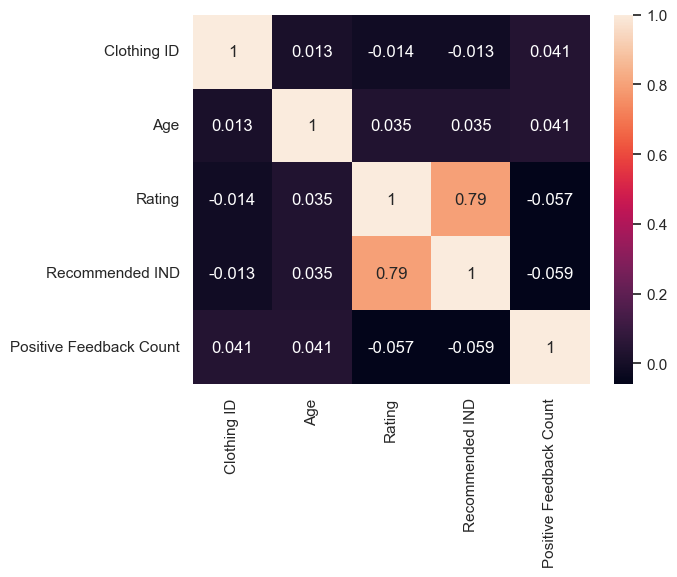

In [115]:
#Variables correlation heatmap
sns.heatmap(df.corr(), annot=True);

Text(0.5, 1.0, 'Rating distribution')

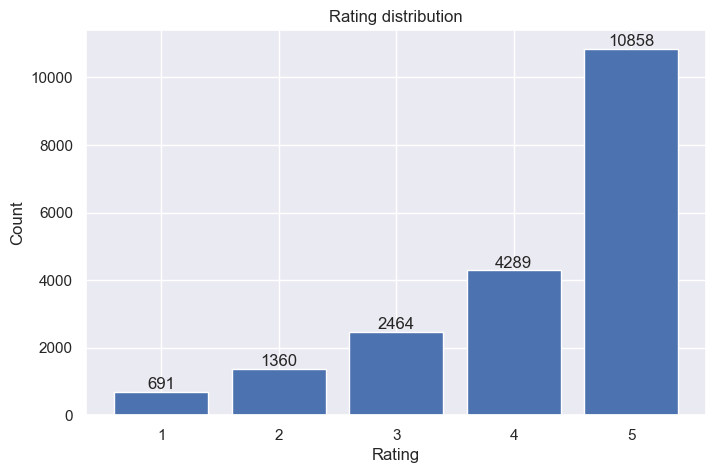

In [116]:
# Ratings bar plot
ratings = df['Rating'].value_counts()
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(ratings.index, ratings.values)
ax.bar_label(bars, label_type='edge')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating distribution')

### Recommended Index Distribution

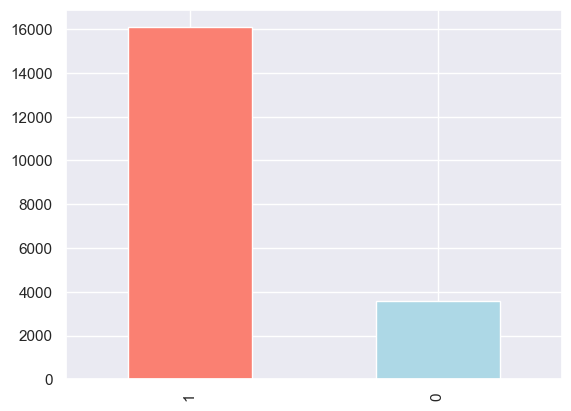

In [117]:
df['Recommended IND'].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [118]:
df['Class Name'].value_counts()

Dresses           5371
Knits             3981
Blouses           2587
Sweaters          1218
Pants             1157
Jeans              970
Fine gauge         927
Skirts             796
Jackets            598
Lounge             574
Swim               293
Outerwear          281
Shorts             260
Sleep              174
Legwear            131
Intimates          120
Layering           115
Trend              107
Casual bottoms       1
Chemises             1
Name: Class Name, dtype: int64

### Age distribution

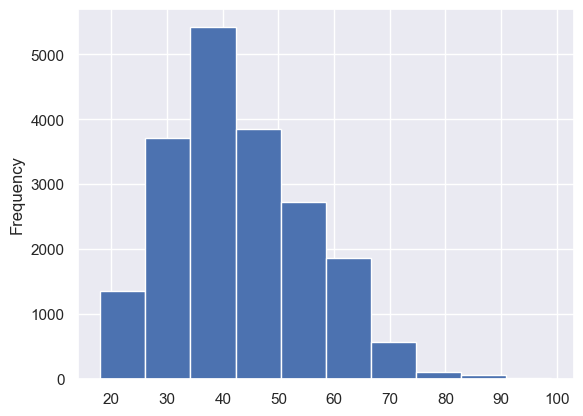

In [119]:
df.Age.plot.hist();

### Recommended IND per Rating

In [120]:
pd.crosstab(df['Rating'], df['Recommended IND'])

Recommended IND,0,1
Rating,,
1,684,7
2,1280,80
3,1444,1020
4,146,4143
5,21,10837


In [121]:
clustering_df=df.drop(['Clothing ID','Title','Review Text'],axis=1)

In [122]:
clustering_df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,60,3,0,0,General,Dresses,Dresses
1,50,5,1,0,General Petite,Bottoms,Pants
2,47,5,1,6,General,Tops,Blouses
3,49,2,0,4,General,Dresses,Dresses
4,39,5,1,1,General Petite,Tops,Knits


In [123]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [124]:
encoder=LabelEncoder()

In [125]:
clustering_df['Division Name']=encoder.fit_transform(clustering_df['Division Name'])
clustering_df['Department Name']=encoder.fit_transform(clustering_df['Department Name'])
clustering_df['Class Name']=encoder.fit_transform(clustering_df['Class Name'])

In [126]:
clustering_df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,60,3,0,0,0,1,3
1,50,5,1,0,1,0,13
2,47,5,1,6,0,4,0
3,49,2,0,4,0,1,3
4,39,5,1,1,1,4,8


In [127]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(clustering_df)
df_scaled

array([[ 1.36559398, -1.06379207, -2.12128738, ..., -0.76750585,
        -0.82720955, -0.75117131],
       [ 0.54978761,  0.73445232,  0.47141185, ...,  0.86958463,
        -1.43983503,  1.16413872],
       [ 0.3050457 ,  0.73445232,  0.47141185, ..., -0.76750585,
         1.01066692, -1.32576431],
       ...,
       [-1.0002445 , -1.06379207, -2.12128738, ...,  0.86958463,
        -0.82720955, -0.75117131],
       [-1.24498642, -1.06379207,  0.47141185, ..., -0.76750585,
        -0.82720955, -0.75117131],
       [ 0.71294888,  0.73445232,  0.47141185, ...,  0.86958463,
        -0.82720955, -0.75117131]])

### WCSS-> Within Cluster Sum of Squares

In [128]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

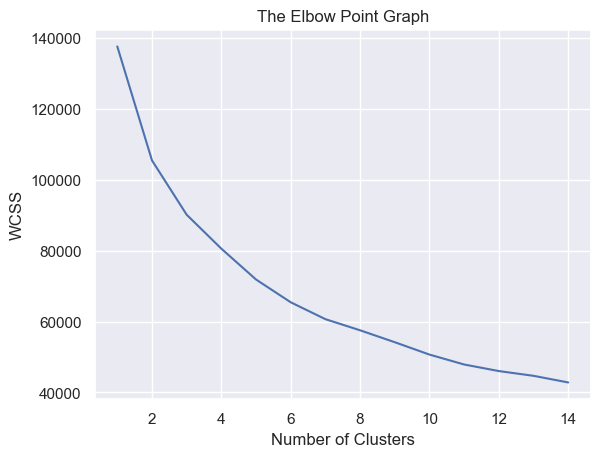

In [129]:
sns.set()
plt.plot(range(1,15),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### The optimum number of clusters seems to be 5

In [130]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_clusters=kmeans.fit_predict(df_scaled)
print(y_clusters)

[1 0 2 ... 1 0 4]


In [131]:
clustering_df['Clusters'] = kmeans.labels_

In [132]:
clustering_df[clustering_df['Clusters']==0]

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Clusters
1,50,5,1,0,1,0,13,0
6,24,5,1,0,0,1,3,0
7,34,5,1,0,0,1,3,0
9,53,5,1,2,1,1,3,0
11,50,3,1,1,0,1,3,0
...,...,...,...,...,...,...,...,...
19652,41,3,1,0,1,1,3,0
19654,39,4,1,5,1,1,3,0
19656,42,5,1,0,1,0,15,0
19657,34,5,1,0,1,1,3,0


In [133]:
clustering_df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Clusters
0,60,3,0,0,0,1,3,1
1,50,5,1,0,1,0,13,0
2,47,5,1,6,0,4,0,2
3,49,2,0,4,0,1,3,1
4,39,5,1,1,1,4,8,3


In [134]:
kmeans.cluster_centers_

array([[-0.05091535,  0.37311545,  0.46913021, -0.13725439, -0.13937023,
        -1.06819833, -0.09606673],
       [-0.08285647, -1.7040957 , -2.11680045, -0.00900468, -0.04127419,
         0.05576985, -0.0242153 ],
       [ 0.08417511,  0.367409  ,  0.46780658, -0.1515054 , -0.76750585,
         0.96405676, -0.0280029 ],
       [ 0.02611518,  0.39725221,  0.46668188, -0.14141039,  1.30861671,
         0.59043489,  0.26778162],
       [ 0.21830581, -0.01896232, -0.01023584,  4.49069072, -0.12690523,
        -0.05719016, -0.29164831]])

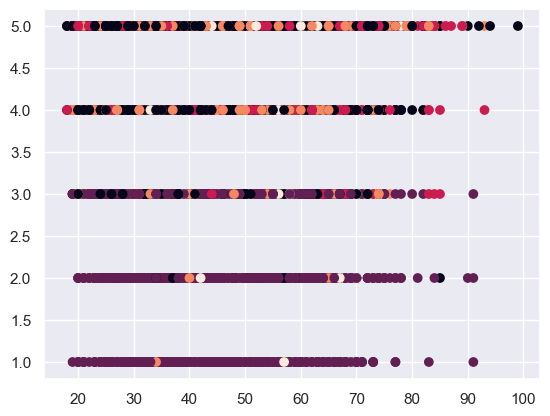

In [135]:
plt.scatter(clustering_df['Age'],clustering_df['Rating'], c=clustering_df['Clusters'])

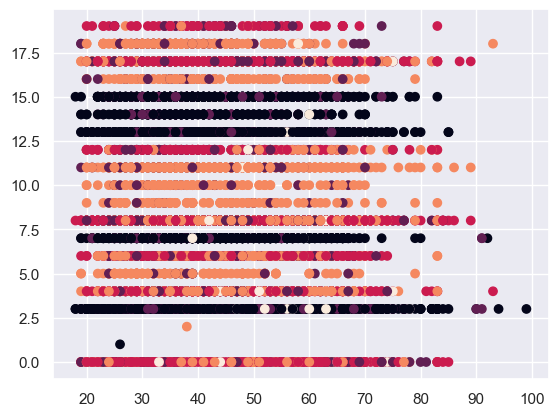

In [136]:
plt.scatter(clustering_df['Age'],clustering_df['Class Name'],c=clustering_df['Clusters'])

<Axes: xlabel='Clusters', ylabel='count'>

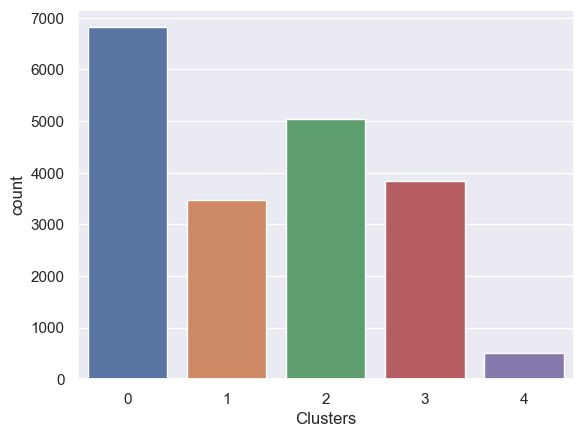

In [137]:
sns.countplot(clustering_df,x='Clusters')

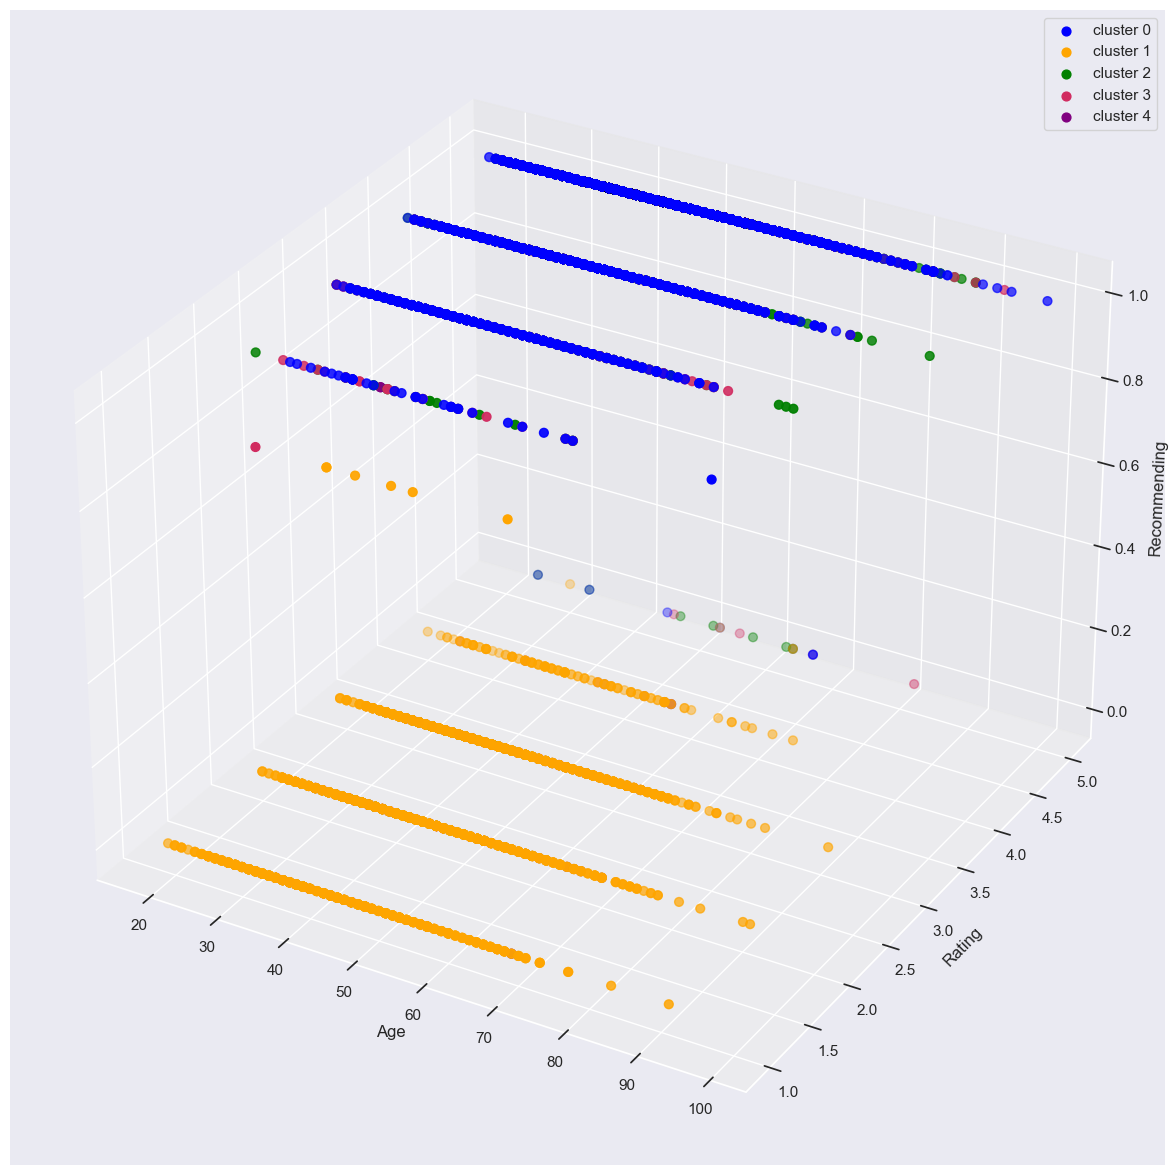

In [138]:
# 3d scatterplot using matplotlib
x=clustering_df.values
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('Age')
ax.set_ylabel('Rating')
ax.set_zlabel('Recommending')
ax.legend()
plt.show()

### Now using only 3 independent variables

In [139]:
clustering_df1=clustering_df[['Age','Rating','Class Name']]

In [140]:
df_scaled1=scaler.fit_transform(clustering_df1)

In [141]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df_scaled1)
    wcss.append(kmeans.inertia_)

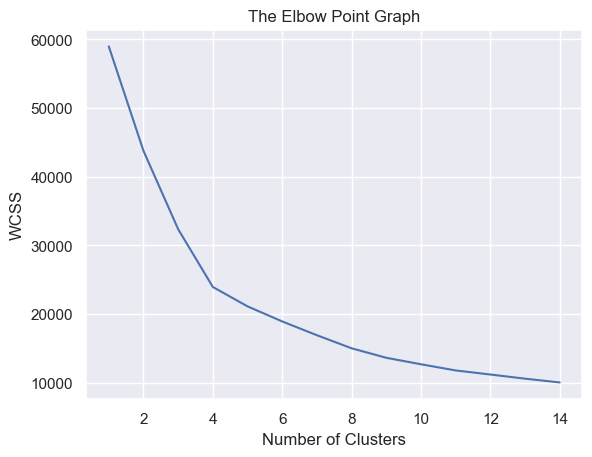

In [142]:
sns.set()
plt.plot(range(1,15),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### The optimum number of clusters seems to be 4.

In [143]:
kmeans=KMeans(n_clusters=4 ,init='k-means++',random_state=0)
y_clusters1=kmeans.fit_predict(df_scaled)
print(y_clusters1)

[2 0 3 ... 2 1 1]


In [144]:
clustering_df1['Clusters'] = kmeans.labels_

In [145]:
clustering_df1.head()

,Age,Rating,Class Name,Clusters
0,60,3,3,2
1,50,5,13,0
2,47,5,0,3
3,49,2,3,2
4,39,5,8,3


<Axes: xlabel='Clusters', ylabel='count'>

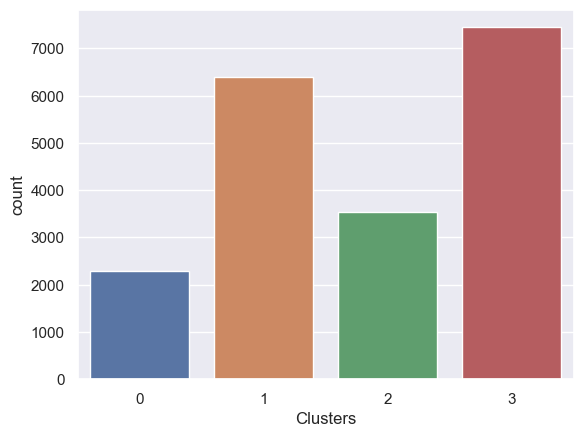

In [146]:
sns.countplot(clustering_df1,x='Clusters')

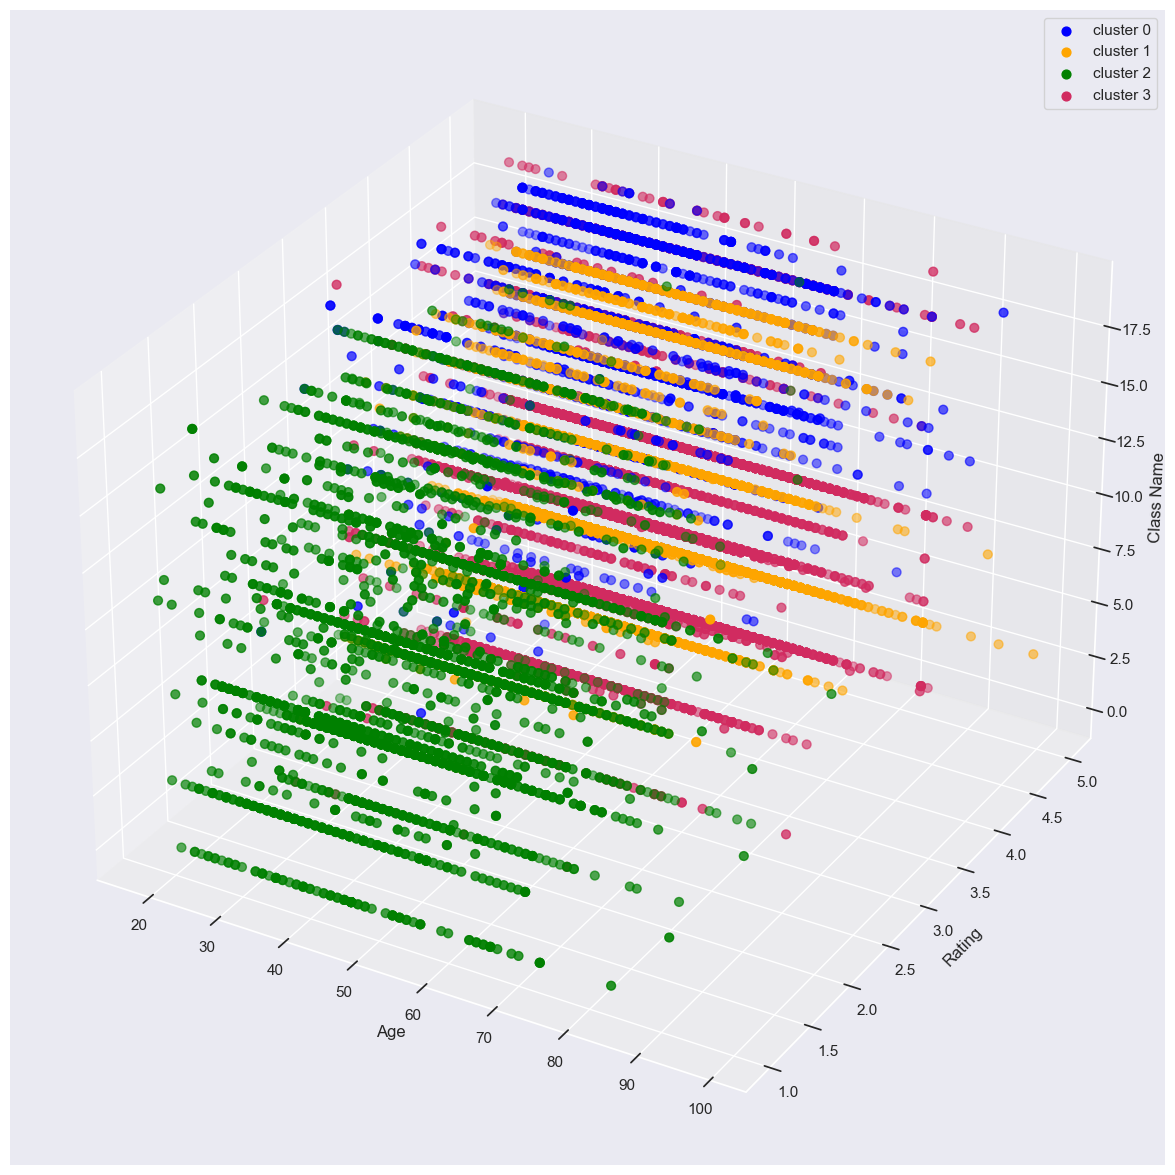

In [147]:
# 3d scatterplot using matplotlib
x=clustering_df1.values
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters1 == 0,0],x[y_clusters1 == 0,1],x[y_clusters1 == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters1== 1,0],x[y_clusters1 == 1,1],x[y_clusters1 == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters1 == 2,0],x[y_clusters1 == 2,1],x[y_clusters1 == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters1 == 3,0],x[y_clusters1 == 3,1],x[y_clusters1 == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.set_xlabel('Age')
ax.set_ylabel('Rating')
ax.set_zlabel('Class Name')
ax.legend()
plt.show()

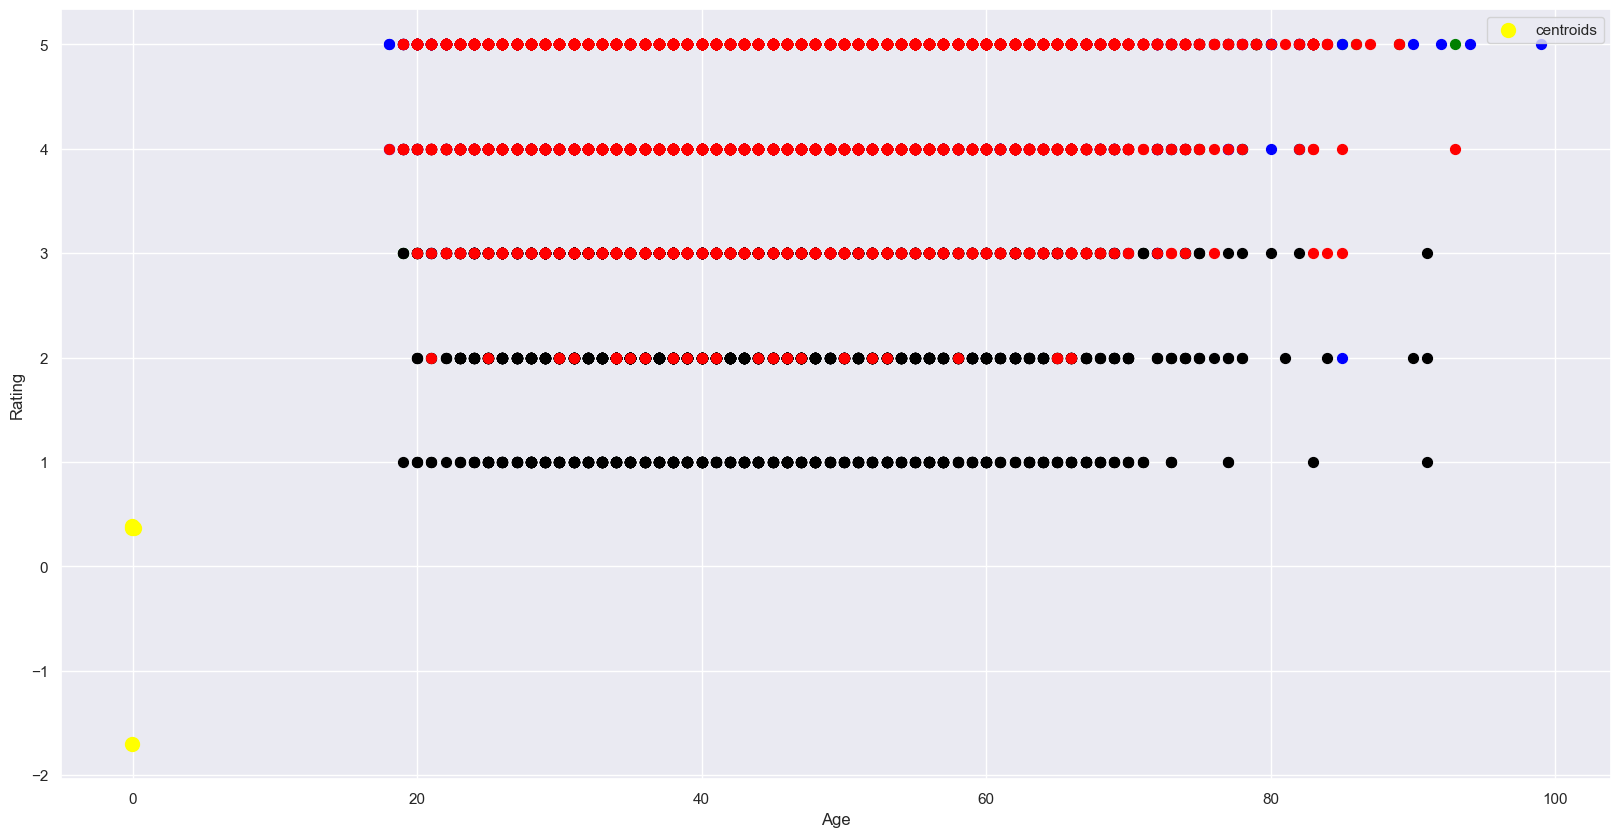

In [152]:
plt.figure(figsize = (20,10))
plt.scatter(x[y_clusters1 == 0,0],x[y_clusters1 == 0,1],s = 50, c = 'green' )
plt.scatter(x[y_clusters1 == 1,0],x[y_clusters1 == 1,1],s = 50, c = 'blue' )
plt.scatter(x[y_clusters1 == 2,0],x[y_clusters1 == 2,1],s = 50, c = 'black' )
plt.scatter(x[y_clusters1 == 3,0],x[y_clusters1 == 3,1],s = 50, c = 'red' )
 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
plt.xlabel("Age")
plt.ylabel("Rating")
plt.legend()
plt.show()